In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Settings to display
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 130

In [112]:
balance = pd.read_csv("./data/balance_sheet.csv")
income = pd.read_csv("./data/income.csv")
price = pd.read_csv("./data/price.csv")
market_news = pd.read_csv("./data/market_news.csv")

price["date"] = pd.DatetimeIndex(price["label"])
price.drop("label", axis=1, inplace=True)
price = price.sort_values(by="date").reset_index(drop=True)


dct = {1:0, 2:2.5, 3:5.0, 4: 7.5}

for key, value in dct.items():
    income.loc[income[income["fiscalQuarter"] == key].index, "fiscalQuarter"] = value

for key, value in dct.items():
    balance.loc[balance[balance["fiscalQuarter"] == key].index, "fiscalQuarter"] = value

income["fiscalQuarter"] = income["fiscalQuarter"].astype(float)
balance["fiscalQuarter"] = balance["fiscalQuarter"].astype(float)
      
balance_income = pd.merge(balance, income, how='left', on=['key', 'fiscalYear', 'fiscalQuarter'])


In [19]:
price.date

0       2016-04-04
1       2016-04-04
2       2016-04-04
3       2016-04-04
4       2016-04-04
           ...    
12583   2021-04-01
12584   2021-04-01
12585   2021-04-01
12586   2021-04-01
12587   2021-04-01
Name: date, Length: 12588, dtype: datetime64[ns]

# Price

## History trend of price for some companies

In [102]:
# Only plot a few companies for simplicity
few_keys = price[price["key"].isin(["AAPL", "ADBE", "AMD", "FB", "SHOP"])]

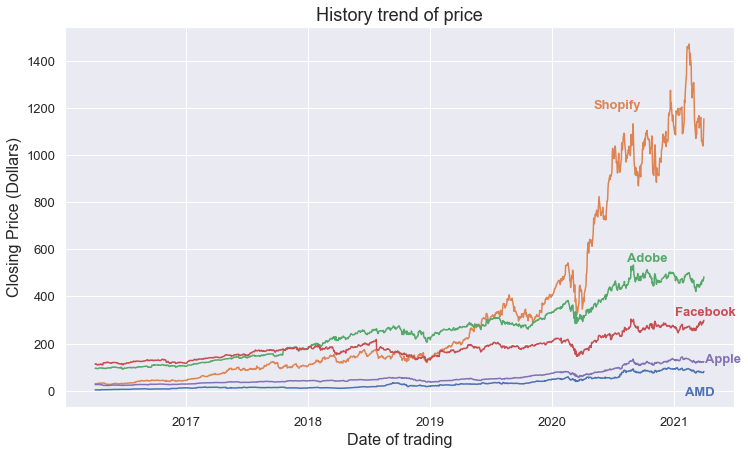

In [109]:
sns.set()

from datetime import datetime

fig, ax = plt.subplots(figsize=(12,7))

sns.lineplot(x="date", y="fClose", hue="key", data=few_keys, legend=False)

plt.xlabel('Date of trading', fontsize=16)
plt.ylabel('Closing Price (Dollars)', fontsize=16)
plt.title('History trend of price', fontsize = 18)

# Text labels for each plotted line
ax.text(x=datetime(2020,5,6), y=1200, s="Shopify", fontsize=13, fontweight='semibold', color='#dd8452')
ax.text(x=datetime(2020,8,15), y=550, s="Adobe", fontsize=13, fontweight='semibold', color='#55a868')
ax.text(x=datetime(2021,1,4), y=320, s="Facebook", fontsize=13, fontweight='semibold', color='#c44e52')
ax.text(x=datetime(2021,4,4), y=120, s="Apple", fontsize=13, fontweight='semibold', color='#8172b3')
ax.text(x=datetime(2021,2,4), y=-20, s="AMD", fontsize=13, fontweight='semibold', color='#4c72b0')

plt.tick_params(axis='both', which='major', labelsize=13)


Most of technology companies’ stocks have the share prices increasing from the past 5 years.

There is a light decrease at the beginning of 2020, it reflects the beginning of the pandemic.

Shopify’s stock price is increasing the most based on the increasing in online shopping because of the pandemic.


## History trend of volumes for some companeis

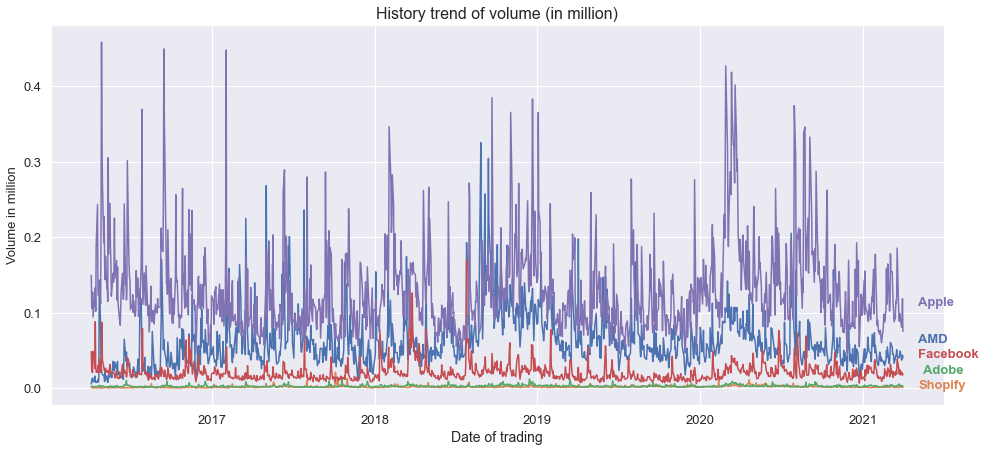

In [110]:
sns.set()

from datetime import datetime

fig, ax = plt.subplots(figsize=(16,7))

few_keys["f_volume_in_million"] = few_keys["fVolume"] / 1000000000

sns.lineplot(x="date", y="f_volume_in_million", hue="key", data=few_keys, legend=False)

plt.xlabel('Date of trading', fontsize=14)
plt.ylabel('Volume in million', fontsize=13)
plt.title('History trend of volume (in million)', fontsize = 16)

# Text labels for each plotted line
ax.text(x=datetime(2021,5,6), y=0.0, s="Shopify", fontsize=13, fontweight='semibold', color='#dd8452')
ax.text(x=datetime(2021,5,15), y=0.02, s="Adobe", fontsize=13, fontweight='semibold', color='#55a868')
ax.text(x=datetime(2021,5,4), y=0.04, s="Facebook", fontsize=13, fontweight='semibold', color='#c44e52')
ax.text(x=datetime(2021,5,4), y=0.11, s="Apple", fontsize=13, fontweight='semibold', color='#8172b3')
ax.text(x=datetime(2021,5,4), y=0.06, s="AMD", fontsize=13, fontweight='semibold', color='#4c72b0')

plt.tick_params(axis='both', which='major', labelsize=13)

In [ ]:
For most companies, large volume around the start of pandemic.

For each company, volume spikes because of some events such as release of new product or release of earnings.


## Moving Average for Apple

In [132]:
apple_price = price[price["key"]=="AAPL"]

for window in [7, 50, 100, 200]:
    apple_price[f"MA{window}"] = apple_price["fClose"].rolling(window).mean()

# df_AAPL['MA200'] = df_AAPL['close'].rolling(200).mean()
# df_AAPL['MA100'] = df_AAPL['close'].rolling(100).mean()
# df_AAPL['MA50'] = df_AAPL['close'].rolling(50).mean()
# df_AAPL['MA7'] = df_AAPL['close'].rolling(7).mean()

# df_AAPL[['fClose', 'MA200', 'MA100', 'MA50', 'MA7']].plot(label = 'AAPL', figsize = (16,8))

Text(2021-01-04 00:00:00, 100, 'MA100')

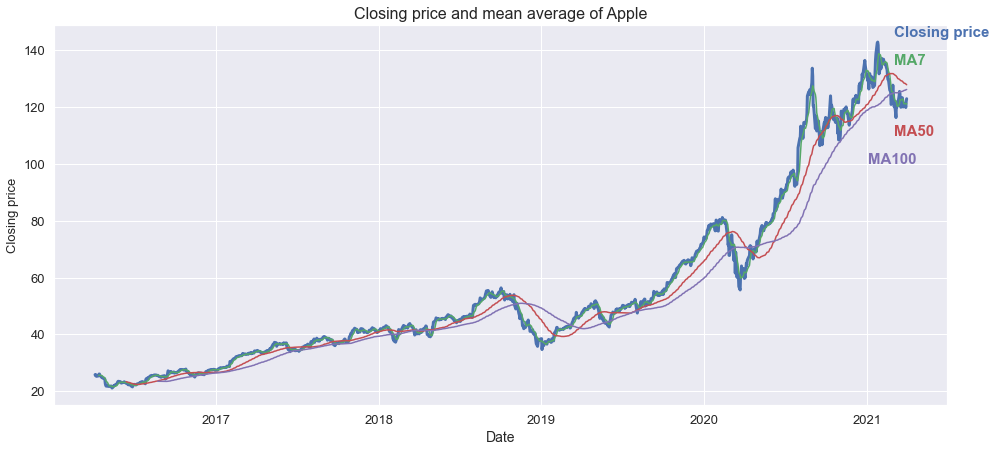

In [154]:
sns.set()

from datetime import datetime

fig, ax = plt.subplots(figsize=(16,7))

sns.lineplot(x="date", y="fClose", data=apple_price, legend=False, linewidth=3, color='#4c72b0')
sns.lineplot(x="date", y="MA7", data=apple_price, legend=False, color='#55a868')
sns.lineplot(x="date", y="MA50", data=apple_price, legend=False, color='#c44e52')
sns.lineplot(x="date", y="MA100", data=apple_price, legend=False, color='#8172b3')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing price', fontsize=13)
plt.title('Closing price and mean average of Apple', fontsize = 16)

plt.tick_params(axis='both', which='major', labelsize=13)


ax.text(x=datetime(2021,3,4), y=145, s="Closing price", fontsize=15, fontweight='semibold', color='#4c72b0')
ax.text(x=datetime(2021,3,4), y=135, s="MA7", fontsize=15, fontweight='semibold', color='#55a868')
ax.text(x=datetime(2021,3,4), y=110, s="MA50", fontsize=15, fontweight='semibold', color='#c44e52')
ax.text(x=datetime(2021,1,4), y=100, s="MA100", fontsize=15, fontweight='semibold', color='#8172b3')
# ax.text(x=datetime(2021,2,4), y=-20, s="AMD", fontsize=13, fontweight='semibold', color='#4c72b0')


The larger cluster of days using MA, the more lags in price adjustment.

The smaller the cluster of days for the MA, the closer to the real prices.

→ The information will be extracted based on the interesting in time of investment


# Balance sheet and income statement

## Total assets vs Year/Quater

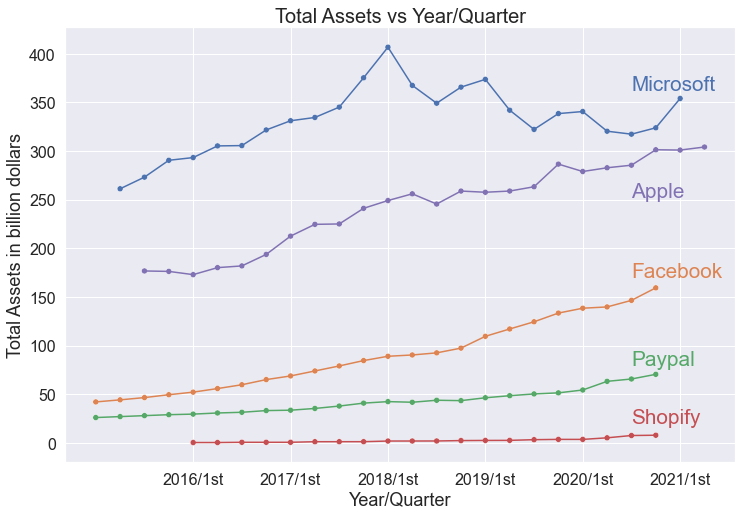

In [88]:
plt.figure(figsize=(12,8))

sns.set_theme()

few_keys = balance_income[balance_income["key"].isin(["AAPL", "FB", "PYPL", "SHOP", "MSFT"])]

# col = ['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3']

few_keys["totalAssets in billion dollars"] = few_keys["totalAssets"] / 1000000000

few_keys["year_quarter"] = (few_keys["fiscalYear"].astype(str) + few_keys["fiscalQuarter"].astype(str)).astype(float)


sns.lineplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=few_keys, legend=False)
sns.scatterplot(x="year_quarter", y="totalAssets in billion dollars", hue="key", data=few_keys, legend=False)

plt.title("Total Assets vs Year/Quarter", fontsize=20)

plt.text(x=20205, y=363, s="Microsoft", fontsize="xx-large", color='#4c72b0')
plt.text(x=20205, y=253, s="Apple", fontsize="xx-large", color= '#8172b3')
plt.text(x=20205, y=170, s="Facebook", fontsize="xx-large", color='#dd8452')
plt.text(x=20205, y=80, s="Paypal", fontsize="xx-large", color='#55a868')
plt.text(x=20205, y=20, s="Shopify", fontsize="xx-large", color='#c44e52')

plt.xticks([20160, 20170, 20180, 20190, 20200, 20210] , ["2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter", fontsize=18)
plt.ylabel("Total Assets in billion dollars", fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=16)


All companies seem to have increasing trend.

Apple’s growth looks like the largest one.

Assets for Shopify hasn’t increased much compared to the growth of price.

## Mean total assets vs long term debt

In [92]:
mean_df = balance_income[balance_income["key"] != "SHOP"].copy()

# mean_df.head()
mean_df = mean_df.groupby(["fiscalYear", "fiscalQuarter"])[["netIncome", "operatingIncome", "totalAssets", "longTermDebt"]].mean()

# mean_df = mean_df.to_frame()
mean_df.reset_index(inplace=True)

mean_df["year_quarter"] = (mean_df["fiscalYear"].astype(str) + mean_df["fiscalQuarter"].astype(str)).astype(float)

mean_df["totalAssets"] = mean_df["totalAssets"] / 1000000000
mean_df["longTermDebt"] = mean_df["longTermDebt"] / 1000000000


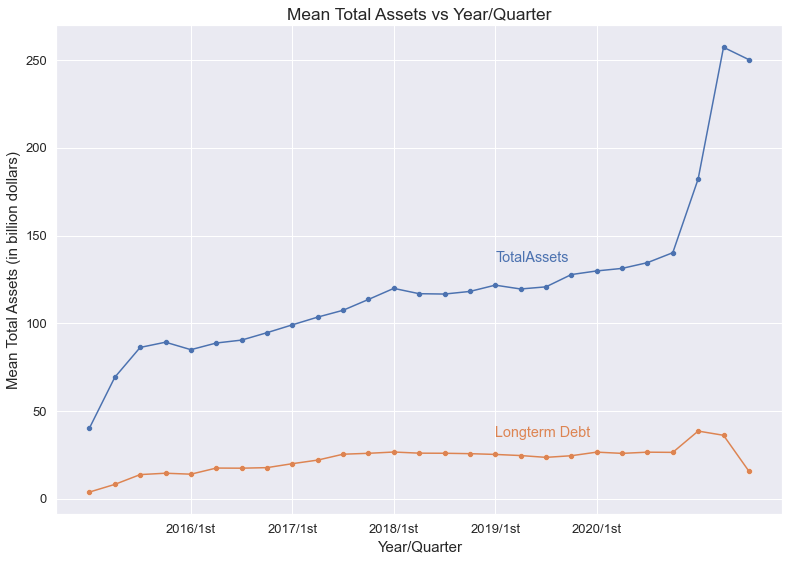

In [111]:
plt.figure(figsize=(13,9))

sns.set_theme()

# sns.lineplot(x="year_quarter", y="netIncome", data=mean_df)
sns.lineplot(x="year_quarter", y="totalAssets", data=mean_df)
sns.lineplot(x="year_quarter", y="longTermDebt", data=mean_df)
sns.scatterplot(x="year_quarter", y="totalAssets", data=mean_df)
sns.scatterplot(x="year_quarter", y="longTermDebt", data=mean_df)

plt.title("Mean Total Assets vs Year/Quarter", fontsize="x-large")
plt.text(x=20190, y=135, s="TotalAssets", fontsize="large", color='#4c72b0')
plt.text(x=20190, y=35, s="Longterm Debt", fontsize="large", color='#dd8452')

plt.xticks([20160, 20170, 20180, 20190, 20200] , ["2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st"])
plt.xlabel("Year/Quarter", fontsize=15)
plt.ylabel("Mean Total Assets (in billion dollars)", fontsize=15)

plt.tick_params(axis='both', which='major', labelsize=13)

Total Assets increased more after 2020/1st quarter.


Long term debts is slightly increasing.
→ Tech companies is investing more money?

## Year-on-year growth and Quater-on-quater growth

In [129]:

for key in tqdm(balance_income["key"].unique()):
    balance_income.loc[balance_income[balance_income["key"] == key].index, "q_change_OperatingIncome"] = balance_income[balance_income["key"] == key][ "operatingIncome"].pct_change(-1)
    balance_income.loc[balance_income[balance_income["key"] == key].index, "shifted_operatingIncome"] = balance_income[balance_income["key"] == key][ "operatingIncome"].shift(-1)

    balance_income.loc[balance_income[balance_income["key"] == key].index, "q_change_NetIncome"] = balance_income[balance_income["key"] == key][ "netIncome"].pct_change(-1)
    balance_income.loc[balance_income[balance_income["key"] == key].index, "shifted_netIncome"] = balance_income[balance_income["key"] == key]["netIncome"].shift(-1)

    for quarter in balance_income[balance_income["key"] == key]["fiscalQuarter"].unique():
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "year_q_change_OperatingIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["operatingIncome"].pct_change(1)
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "year_q_change_NetIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["netIncome"].pct_change(1)

        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "shifted_year_OperatingIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["operatingIncome"].shift(1)
        balance_income.loc[balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)].index, "shifted_year_NetIncome"] = balance_income[(balance_income["key"] == key) & (balance_income["fiscalQuarter"] == quarter)]["netIncome"].shift(1)

balance_income.loc[balance_income[(balance_income["shifted_operatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)].index, "q_change_OperatingIncome"] = -balance_income[(balance_income["shifted_operatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)]["q_change_OperatingIncome"]
balance_income.loc[balance_income[(balance_income["shifted_netIncome"] < 0) & (balance_income["netIncome"] > 0)].index, "q_change_NetIncome"] = -balance_income[(balance_income["shifted_netIncome"] < 0) & (balance_income["netIncome"] > 0)]["q_change_NetIncome"]

balance_income.loc[balance_income[(balance_income["shifted_year_OperatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)].index, "year_q_change_OperatingIncome"] = -balance_income[(balance_income["shifted_year_OperatingIncome"] < 0) & (balance_income["operatingIncome"] > 0)]["year_q_change_OperatingIncome"]
balance_income.loc[balance_income[(balance_income["shifted_year_NetIncome"] < 0) & (balance_income["netIncome"] > 0)].index, "year_q_change_NetIncome"] = -balance_income[(balance_income["shifted_year_NetIncome"] < 0) & (balance_income["netIncome"] > 0)]["year_q_change_NetIncome"]


fill_cols = ["year_q_change_OperatingIncome",  "q_change_OperatingIncome", "q_change_NetIncome", "year_q_change_NetIncome"]
balance_income[fill_cols] = balance_income[fill_cols].fillna(0)


balance_income.drop(["shifted_netIncome", "shifted_operatingIncome", "shifted_year_OperatingIncome", "shifted_year_NetIncome"], axis=1, inplace=True)




  0%|          | 0/10 [00:00<?, ?it/s]

## Quarter-on-quater growth of Apple

Text(0, 0.5, 'Quarter-on-Quarter growth')

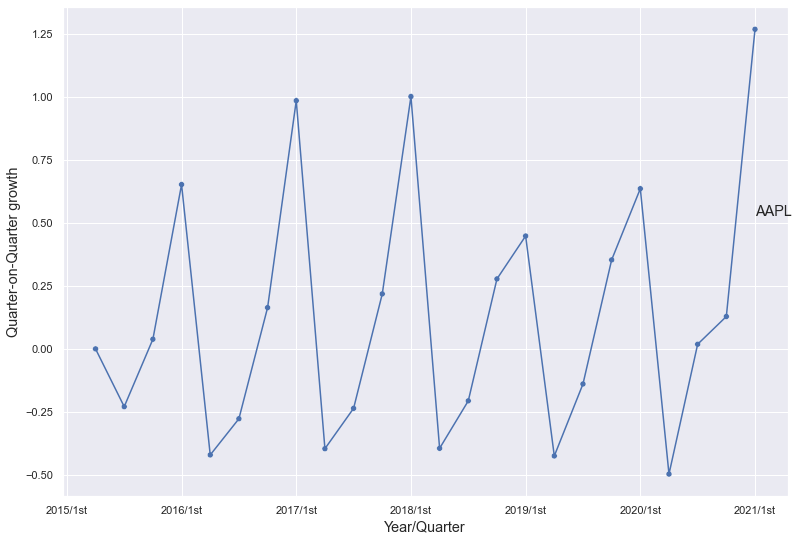

In [130]:
plt.figure(figsize=(13,9))

sns.set_theme()

few_keys = balance_income[balance_income["key"].isin(["AAPL"])]

few_keys["year_quarter"] = (few_keys["fiscalYear"].astype(str) + few_keys["fiscalQuarter"].astype(str)).astype(float)


sns.lineplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys, legend=False)
sns.scatterplot(x="year_quarter", y="q_change_OperatingIncome", hue="key", data=few_keys, legend=False)

plt.text(x=20210, y=0.53, s="AAPL", fontsize="large")

plt.xticks([20150, 20160, 20170, 20180, 20190, 20200, 20210] , ["2015/1st", "2016/1st", "2017/1st", "2018/1st", "2019/1st", "2020/1st", "2021/1st"])
plt.xlabel("Year/Quarter", fontsize="large")
plt.ylabel("Quarter-on-Quarter growth", fontsize="large")

Notice that the growth is the highest every time for the first quarter.
It could be related to the time for new products and 1st quarter tends to have more income.

## Correlation between variables

In [94]:
num_data = balance_income.select_dtypes(include=["float", "int"]).copy()

In [95]:
na_cols = ["fiscalQuarter", "netTangibleAssets", "currentAssets", "currentCash", "currentLongTermDebt", "otherCurrentAssets",
               "goodwill", "inventory", "minorityInterest_x", "ebit", "netIncomeBasic", "pretaxIncome", "sellingGeneralAndAdmin",
              "otherCurrentLiabilities", "otherLiabilities", "propertyPlantEquipment", "shareholderEquity", "intangibleAssets",
              "otherAssets", "treasuryStock", "totalCurrentLiabilities", "capitalSurplus"]

use_cols = [i for i in num_data.columns.values if i not in na_cols]

corr = num_data[use_cols].corr()

na_corr = np.triu(corr)

Text(0.5, 1.05, 'Pearson Correlation Between Technical Indicators')

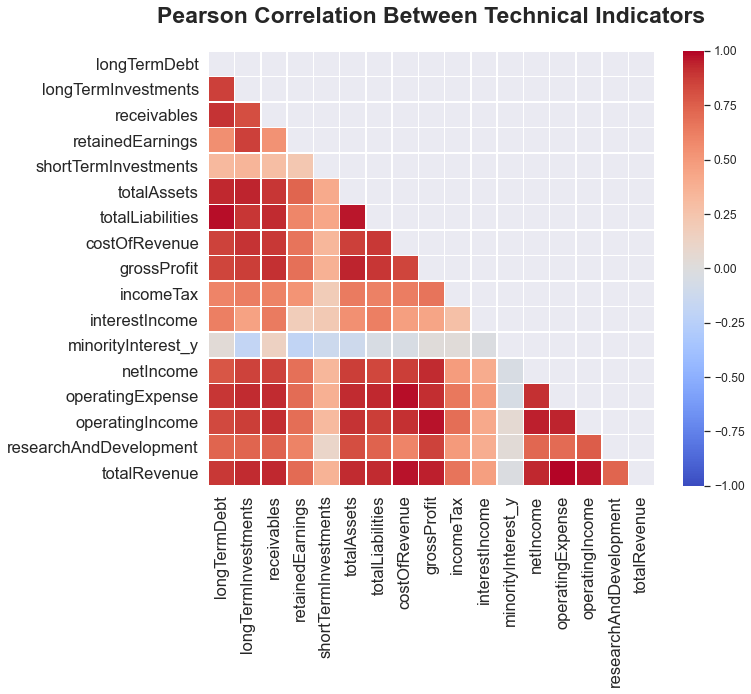

In [100]:
plt.figure(figsize=(10,8))

plt.title("Pearson correlation between variables", fontsize="large")

sns.set(font_scale=1.1)

sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap="coolwarm", mask=na_corr, linewidths=.5)

plt.title('Pearson Correlation Between Technical Indicators', fontsize = 23, y =1.05, fontweight="bold")

Most variables have positive pearson correlation.


Long term debt and assets have positive correlation. 
→ It may imply that companies borrow money to invest in their technologies.

# News

## Plot number of positive, negative, and neutral feelings in market news

In [124]:
market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()

# Create sentiment categorical feature
# create a list of our conditions
conditions = [
    (market_news['score'] > 0),
    (market_news['score'] == 0),
    (market_news['score'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
market_news['level'] = np.select(conditions, values)

market_news.head()


,date,score,level
0,2020-04-01,0.050200,positive
1,2020-04-02,0.001914,positive
2,2020-04-03,0.000000,neutral
3,2020-04-05,0.000000,neutral
4,2020-04-06,-0.200040,negative


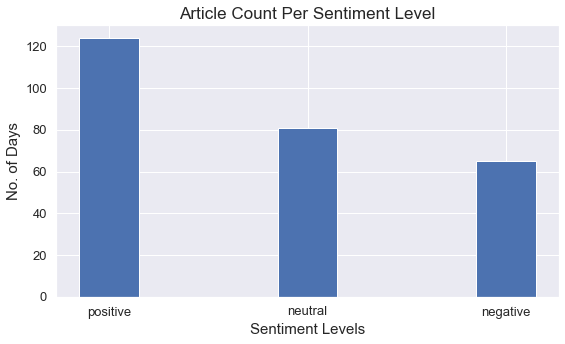

In [125]:
fig = plt.figure(figsize = (9, 5))
 
# creating the bar plot
plt.bar(values, market_news['level'].value_counts(), color ='#4c72b0', width = 0.3)
 
plt.xlabel("Sentiment Levels", size = 15)
plt.ylabel("No. of Days", size = 15)
plt.title("Article Count Per Sentiment Level", size = 17)

plt.tick_params(axis='both', which='major', labelsize=13)

Much more negative news about general market, than stock news.
Neutral news seems the same between both the stock and market news.
Bias in positive news for stocks could be explained by performance of stock market compared to the economy as whole.


## Market sentiments score for the past year

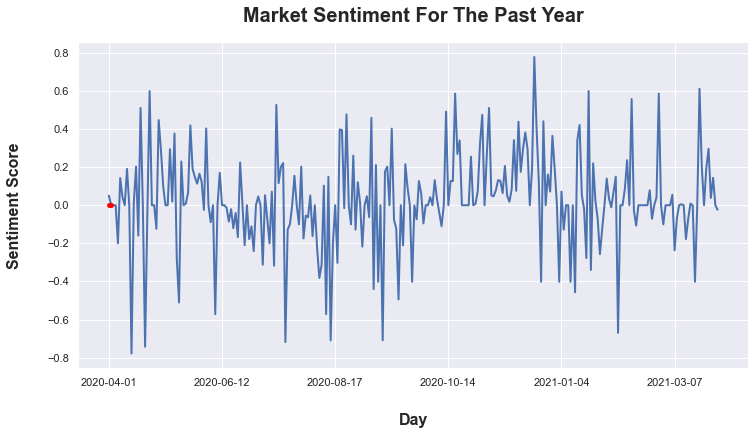

In [127]:
score_plot = market_news.plot(x = 'date', figsize = (12,6), color = '#4c72b0', linewidth=2,
                              grid = True, legend = False)

plt.title("Market Sentiment For The Past Year", pad = 20, fontweight='bold', size = 20)

locs, labels=plt.xticks()

plt.xlabel("Day", size = 16, weight = 'bold', labelpad = 25)
plt.ylabel("Sentiment Score", size = 16, weight = 'bold', labelpad = 25)

plt.plot(["2020-04-01", "2021-03-01"], [0, 0], color = "red", linewidth = 5)

We notice that there is huge decrease in sentiment score at the start of 2020 when the COVID became serious issue around the world.

In [178]:
import requests
import io

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/price.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_price = pd.read_csv(io.StringIO(download.decode('utf-8')))


stock_price['date'] = pd.DatetimeIndex(stock_price['label'])

stock_price['date'] = stock_price['date'].dt.strftime('%Y-%m-%d')

stock_price = stock_price.loc[(stock_price['date'] >= '2020-04-01')
                     & (stock_price['date'] <= '2021-04-01')]

stock_price['year-month'] = stock_price['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

stock_price_month = stock_price.groupby('year-month').agg({'changePercent' : 'mean'}).reset_index()

stock_price_month.head()

,year-month,changePercent
0,2020-04,-0.008109
1,2020-05,-0.005379
2,2020-06,-0.003836
3,2020-07,-0.004269
4,2020-08,-0.005239


In [179]:
# Import Stock News Data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/stock_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_news = pd.read_csv(io.StringIO(download.decode('utf-8')))

stock_news = stock_news.groupby('date').agg({'score' : 'mean'}).reset_index()

stock_news['year-month'] = stock_news['date'].str.slice(0, 7)

stock_news["date"] = pd.DatetimeIndex(stock_news["date"])

stock_news = stock_news.loc[(stock_news['date'] >= '2020-04-01')
                     & (stock_news['date'] <= '2021-04-01')]

stock_news['week'] = stock_news['date'].dt.isocalendar().week

# Aggregate the scores of news articles released on the same month

stock_news_month = stock_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()

stock_news_week = stock_news.groupby('week').agg({'score' : 'mean'}).reset_index()

stock_news_month.head()

,year-month,score
0,2020-04,0.093445
1,2020-05,0.111049
2,2020-06,0.012586
3,2020-07,-0.023025
4,2020-08,0.072480


In [180]:
# Import market news data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/market_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
market_news = pd.read_csv(io.StringIO(download.decode('utf-8')))

market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()

market_news['year-month'] = market_news['date'].str.slice(0, 7)

market_news["date"] = pd.DatetimeIndex(market_news["date"])

market_news = market_news.loc[(market_news['date'] >= '2020-04-01')
                     & (market_news['date'] <= '2021-04-01')]

market_news['week'] = market_news['date'].dt.isocalendar().week

# Aggregate the scores of news articles released on the same month

market_news_month = market_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()

market_news_week = market_news.groupby('week').agg({'score' : 'mean'}).reset_index()

market_news_month.head()

,year-month,score
0,2020-04,0.010661
1,2020-05,0.087572
2,2020-06,-0.063644
3,2020-07,-0.032407
4,2020-08,-0.054647


Text(2020-04, 0.14, 'Stock News Sentiment Score')

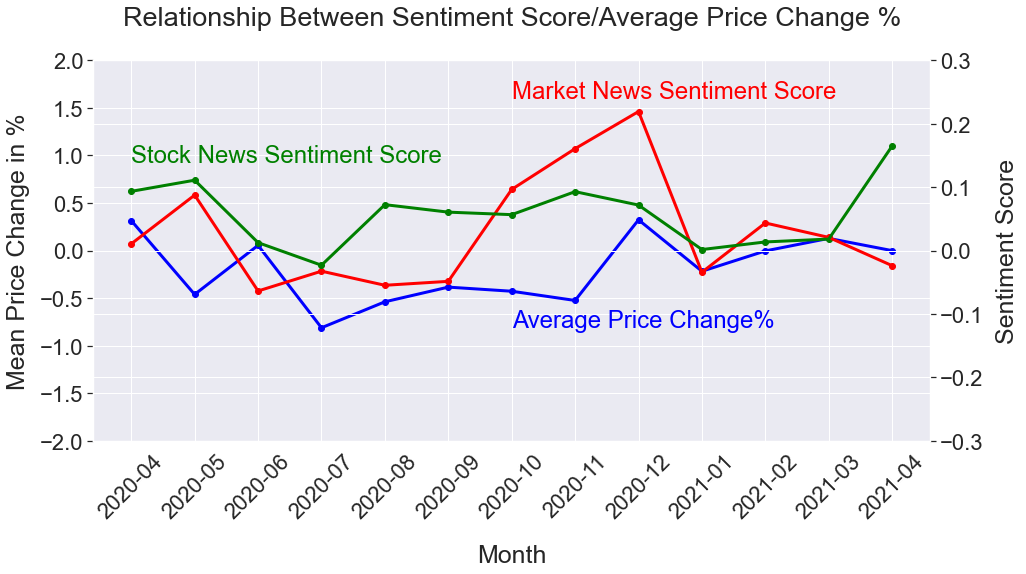

In [181]:

fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(price_month['year-month'], price_month['changePercent']*100, color = "Blue",
         label = "Mean Change in Price", linewidth = 3)
ax1.scatter(price_month['year-month'], price_month['changePercent']*100, color="Blue",
            label = "Mean Change in Price")

ax2.plot(market_news_month['year-month'], market_news_month['score'], color="Red", label = "Market Sentiment Score",
         linewidth = 3)
ax2.plot(stock_news_month['year-month'], stock_news_month['score'], color="Green", label = "Stock Sentiment Score",
         linewidth = 3)

ax2.scatter(market_news_month['year-month'], market_news_month['score'], color="Red", label = "Market Sentiment Score")
ax2.scatter(stock_news_month['year-month'], stock_news_month['score'], color="Green", label = "Stock Sentiment Score" )

ax1.set_xlabel('Month', size = 25, labelpad = 22)
ax2.set_ylabel('Sentiment Score', size = 25, labelpad = 13)
ax1.set_ylabel('Mean Price Change in %', size = 25, labelpad = 10)

ax1.set_title("Relationship Between Sentiment Score/Average Price Change %", pad = 35, size = 27)

ax1.tick_params(labelsize=22)
ax2.tick_params(labelsize=22)
ax1.tick_params(labelrotation = 45, axis = 'x')

ax1.set_ylim([-2,2])
ax2.set_ylim([-0.3,0.3])

plt.text(x="2020-10", y=-0.12, s="Average Price Change%", fontsize=24, color = "Blue")
plt.text(x="2020-10", y=0.24, s="Market News Sentiment Score", fontsize=24, color = "Red")
plt.text(x="2020-04", y=0.14, s="Stock News Sentiment Score", fontsize=24, color = "Green")

Change in stock price follows market or stock news depending on how strong the sentiment is. Some cases the price follows neither.
Change in price is often delayed by news which can be seen on the chart